# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

# Data Description:
# Murder -- Muder rates in different places of United States
# Assualt- Assualt rate in different places of United States
# UrbanPop - urban population in different places of United States
# Rape - Rape rate in different places of United States


### 1. Hierarchical Clustering

In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
crime = pd.read_csv("C:\\My Computer\\Documents\\Excler\\Assignment\\Clustering\\crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
# Standardization function - converting into Z scores
def std_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [4]:
# Standardized data frame (considering the numerical part of data, ignoring name column)
df_norm = std_func(crime.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,1.242564,0.782839,-0.520907,-0.003416
1,0.507862,1.106823,-1.211764,2.484203
2,0.071633,1.478803,0.998980,1.042878
3,0.232349,0.230868,-1.073593,-0.184917
4,0.278268,1.262814,1.758923,2.067820
5,0.025715,0.398859,0.860809,1.864967
6,-1.030419,-0.729082,0.791723,-1.081741
7,-0.433474,0.806838,0.446294,-0.579946
8,1.747671,1.970778,0.998980,1.138967
9,2.206860,0.482855,-0.382735,0.487702


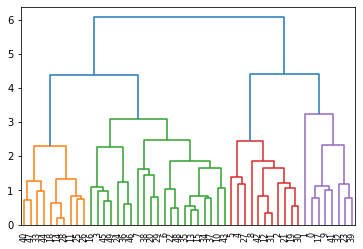

In [5]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [9]:
# create clusters #decide n_clusters from the dendrogram
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [10]:
#save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters = pd.DataFrame(y_hc, columns = ['Clusters'])
Clusters

,Clusters
0,0
1,0
2,2
3,1
4,2
5,2
6,1
7,1
8,2
9,0


In [11]:
y_hc

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1], dtype=int64)

In [12]:
crime['h_clusterid'] = pd.Series(y_hc)
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [13]:
crime.iloc[:,1:].groupby('h_clusterid').mean()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,14.087500,252.750000,53.500000,24.537500
1,5.871429,134.476190,70.761905,18.580952
2,11.054545,264.090909,79.090909,32.618182
3,3.180000,78.700000,49.300000,11.630000


As seen above, we can say that cluster 2 has a higher crime rate compared to other three clusters.

### 2. K-Means Clustering

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

C:\Users\yasha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


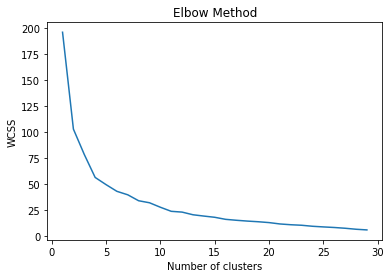

In [18]:
wcss = []
for i in range(1,30):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(df_norm)

KMeans(n_clusters=4, random_state=42)

In [20]:
clusters_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [21]:
crime1 = crime.copy()

In [25]:
#Assign clusters to the data set
crime1['clusterid_new'] = clusters_new.labels_

In [26]:
#standardized values
clusters_new.cluster_centers_

array([[-0.48943754, -0.38260013,  0.57582979, -0.26165379],
       [ 1.41188984,  0.8743346 , -0.81452109,  0.01927104],
       [ 0.6950701 ,  1.03944141,  0.72263703,  1.27693964],
       [-0.96154072, -1.106601  , -0.93010687, -0.96676331]])

In [27]:
crime1.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape,h_clusterid,culsterid_new
,,mean,mean,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250,1.000000,0
1,1,13.937500,243.625000,53.750000,21.412500,0.125000,1
2,2,10.815385,257.384615,76.000000,33.192308,1.769231,2
3,3,3.600000,78.538462,52.076923,12.176923,2.538462,3


As seen above, we can conclude that cluster 2 has a higher crime rate compared to other three clusters.

In [28]:
crime1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,culsterid_new,clusterid_new
0,Alabama,13.2,236,58,21.2,0,1,1
1,Alaska,10.0,263,48,44.5,0,2,2
2,Arizona,8.1,294,80,31.0,2,2,2
3,Arkansas,8.8,190,50,19.5,1,1,1
4,California,9.0,276,91,40.6,2,2,2
5,Colorado,7.9,204,78,38.7,2,2,2
6,Connecticut,3.3,110,77,11.1,1,0,0
7,Delaware,5.9,238,72,15.8,1,0,0
8,Florida,15.4,335,80,31.9,2,2,2
9,Georgia,17.4,211,60,25.8,0,1,1


In [31]:
crime1.drop(['culsterid_new'], axis = 1, inplace = True)
crime1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,0,2
2,Arizona,8.1,294,80,31.0,2,2
3,Arkansas,8.8,190,50,19.5,1,1
4,California,9.0,276,91,40.6,2,2
5,Colorado,7.9,204,78,38.7,2,2
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,2,2
9,Georgia,17.4,211,60,25.8,0,1


### DBSCAN

In [32]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(df_norm)

DBSCAN(eps=1)

In [46]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  1, -1,  0, -1,  0,  0,  0, -1,  0,  1, -1, -1, -1,  0,
        0,  0,  0,  0,  1, -1,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0],
      dtype=int64)

In [48]:
#Adding clusters to dataset
crime2 = crime1.copy()
crime2['clusters'] = dbscan.labels_

#### All the three clustering results together in a table

In [49]:
crime2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new,clusters
0,Alabama,13.2,236,58,21.2,0,1,-1
1,Alaska,10.0,263,48,44.5,0,2,-1
2,Arizona,8.1,294,80,31.0,2,2,-1
3,Arkansas,8.8,190,50,19.5,1,1,0
4,California,9.0,276,91,40.6,2,2,-1
5,Colorado,7.9,204,78,38.7,2,2,-1
6,Connecticut,3.3,110,77,11.1,1,0,0
7,Delaware,5.9,238,72,15.8,1,0,-1
8,Florida,15.4,335,80,31.9,2,2,-1
9,Georgia,17.4,211,60,25.8,0,1,-1
